# Hypothesis Testing

t-statistic: 2.9704426289300225
Two-tailed p-value: 0.02494322329439157
One-tailed p-value: 0.012471611647195785


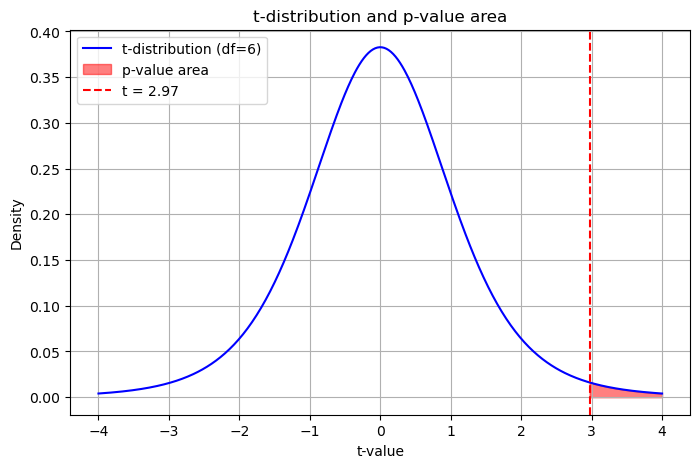

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Student A and B scores
A = np.array([82, 88, 84, 86])
B = np.array([78, 80, 79, 83])

# Perform independent two-sample t-test
t_stat, p_val_two_tailed = stats.ttest_ind(A, B, equal_var=True)
df = len(A) + len(B) - 2  # degrees of freedom

print("t-statistic:", t_stat)
print("Two-tailed p-value:", p_val_two_tailed)

# For visualization, let's also compute one-tailed p-value
p_val_one_tailed = p_val_two_tailed / 2
print("One-tailed p-value:", p_val_one_tailed)

# ---- Plotting the t-distribution ----
x = np.linspace(-4, 4, 500)
y = stats.t.pdf(x, df)  # t-distribution PDF

plt.figure(figsize=(8, 5))
plt.plot(x, y, 'b-', label=f't-distribution (df={df})')

# Shade the rejection region (one-tailed, right side)
x_fill = np.linspace(t_stat, 4, 200)
y_fill = stats.t.pdf(x_fill, df)
plt.fill_between(x_fill, y_fill, alpha=0.5, color='red', label='p-value area')

# Mark the observed t-statistic
plt.axvline(t_stat, color='red', linestyle='--', label=f't = {t_stat:.2f}')

plt.title("t-distribution and p-value area")
plt.xlabel("t-value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


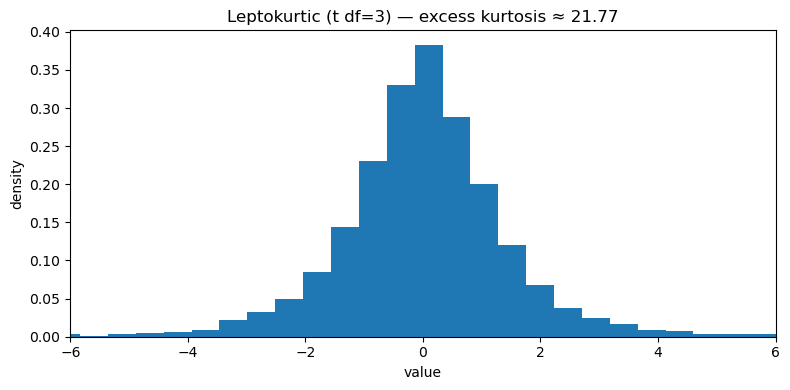

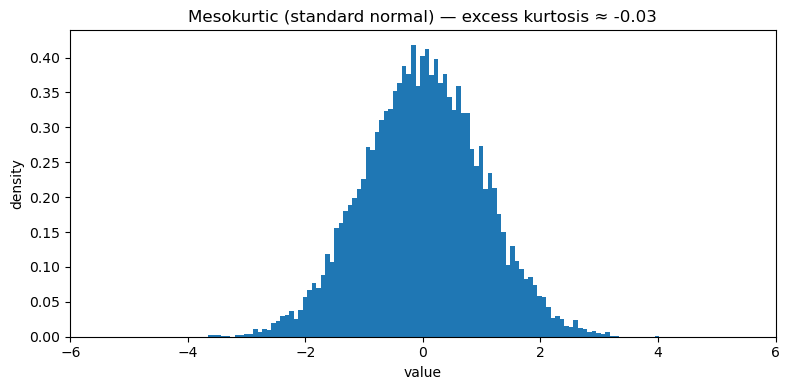

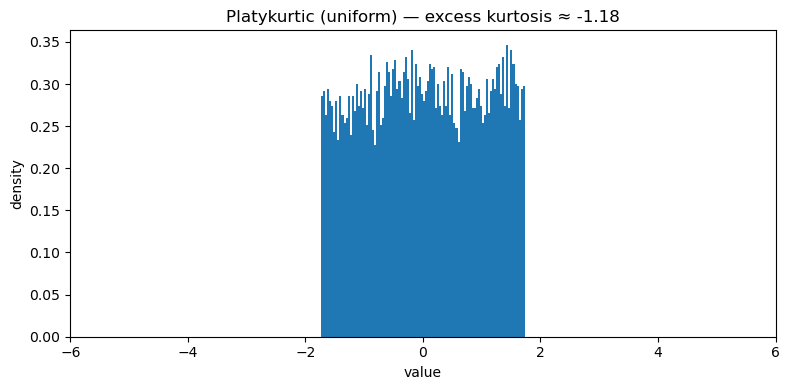

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def sample_excess_kurtosis(x):
    # simple (biased) sample excess kurtosis (Fisher definition)
    m = x.mean()
    m2 = np.mean((x - m)**2)
    m4 = np.mean((x - m)**4)
    return m4 / (m2**2) - 3.0

n = 10000  # sample size (big so shapes are clear)
bins = 100
xlim = (-6, 6)

# 1) Leptokurtic: Student's t with low df -> heavy tails, sharp peak
df = 3
x_t = np.random.standard_t(df, size=n)
kurt_t = sample_excess_kurtosis(x_t)

plt.figure(figsize=(8,4))
plt.hist(x_t, bins=bins, density=True)
plt.xlim(xlim)
plt.title(f"Leptokurtic (t df={df}) — excess kurtosis ≈ {kurt_t:.2f}")
plt.xlabel("value")
plt.ylabel("density")
plt.tight_layout()
plt.show()

# 2) Mesokurtic: Normal (reference)
x_norm = np.random.normal(loc=0, scale=1, size=n)
kurt_norm = sample_excess_kurtosis(x_norm)

plt.figure(figsize=(8,4))
plt.hist(x_norm, bins=bins, density=True)
plt.xlim(xlim)
plt.title(f"Mesokurtic (standard normal) — excess kurtosis ≈ {kurt_norm:.2f}")
plt.xlabel("value")
plt.ylabel("density")
plt.tight_layout()
plt.show()

# 3) Platykurtic: Uniform distribution (flat top, light tails)
# choose uniform with variance ~=1 to make visual scale similar:
# Uniform(-sqrt(3), sqrt(3)) has variance 1
a = np.sqrt(3)
x_unif = np.random.uniform(-a, a, size=n)
kurt_unif = sample_excess_kurtosis(x_unif)

plt.figure(figsize=(8,4))
plt.hist(x_unif, bins=bins, density=True)
plt.xlim(xlim)
plt.title(f"Platykurtic (uniform) — excess kurtosis ≈ {kurt_unif:.2f}")
plt.xlabel("value")
plt.ylabel("density")
plt.tight_layout()
plt.show()
